# Entree Task: Implementing Your Own Neural Networks from Scratch

In [1]:
import math
import numpy as np
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt

## Task 1: Linear Layer 
Implement the forward and backward functions for a linear layer. Please read the requirement details for Task 1 in the code comment and in the pdf document.

In [54]:
class LinearLayer:
    def __init__(self, _m, _n):
        '''
        :param _m: _m is the input X hidden size
        :param _n: _n is the output Y hidden size
        '''
        # "Kaiming initialization" is important for neural network to converge. The NN will not converge without it!
        self.W = (np.random.uniform(low=-10000.0, high=10000.0, size = (_m, _n)))/10000.0*np.sqrt(6.0/ _m)
        self.B = np.eye(_n) #identity matrix
        self.stored_X = None
        self.W_grad = None    #record the gradient of the weight
        self.B_grad = None    #record the gradient of the bias
        self.WX = None
        self.WX_B = None
       
    def forward(self, X):
        '''
        :param X: shape(X)[0] is batch size and shape(X)[1] is the #features
         (1) Store the input X in stored_data for Backward.
         (2) :return: X * weights
        '''
        
        ########## Code start  ##########
        
        self.stored_X = X
        self.WX = np.dot(X, self.W)             # w*x
        self.WX_B = np.dot(self.WX, self.B)     # w*x+b
        
        return self.WX_B
        
        
        ##########  Code end   ##########
    
    def backward(self, Y_grad):
        '''
        /* shape(output_grad)[0] is batch size and shape(output_grad)[1] is the # output features (shape(weight)[1])
         * 1) Calculate the gradient of the output (the result of the Forward method) w.r.t. the **W** and store the product of the gradient and Y_grad in W_grad
         * 2) Calculate the gradient of the output (the result of the Forward method) w.r.t. the **X** and return the product of the gradient and Y_grad
         */
        '''
        
        ########## Code start  ##########
        
        self.B_grad = np.dot(self.WX.T, Y_grad)
        self.W_grad = np.dot(self.stored_X.T, np.dot(Y_grad, self.B))
        dxdL = np.dot(np.dot(Y_grad,self.B), self.W.T )
        
        return dxdL
        
        
        ##########  Code end   ##########
        
        

## Checkpoint 1: Linear Layer
Check your linear forward and backward function implementations with numerical derivatives.


In [55]:
#gradient check
import copy
#Random test
n = 3
m = 6
Y_grad = np.random.rand(1, m)
test_vector = np.random.rand(1, n)
DELTA = 1e-6
test_layer = LinearLayer(n, m)

test_layer_1 = copy.deepcopy(test_layer)
test_layer_2 = copy.deepcopy(test_layer)

test_layer.forward(test_vector)
Your_backward = test_layer.backward(Y_grad)

cal_gradient = np.zeros((np.shape(test_vector)[0], np.shape(test_vector)[1]))
for t_p in range(np.shape(test_vector)[0]):
    for i in range(np.shape(test_vector)[1]):
        test_vector_1 = copy.deepcopy(test_vector)
        test_vector_2 = copy.deepcopy(test_vector)
        test_vector_1[t_p][i] = test_vector_1[t_p][i] + DELTA
        test_vector_2[t_p][i] = test_vector_2[t_p][i] - DELTA

        cal_gradient[t_p][i] = np.sum(
            (np.dot(Y_grad, np.transpose(test_layer_1.forward(test_vector_1) - test_layer_2.forward(test_vector_2))/(2*DELTA))))


print('Your gradient: ',Your_backward)
print('Numerical gradient:',cal_gradient)
print('Error: ',abs(np.sum(Your_backward - cal_gradient)))

if abs(np.sum(Your_backward - cal_gradient)) < 1e-4:
    print('Correct backward. Congratulations!')
else:
    print('Wrong backawrd. Please check your implementation again.')

Your gradient:  [[-0.15702974 -0.84421207 -1.28522189]]
Numerical gradient: [[-0.15702974 -0.84421207 -1.28522189]]
Error:  9.641021314621412e-11
Correct backward. Congratulations!


## Task 2: Non-Linear Activation
Implement the forward and backward functions for a nonlinear layer. Please read the requirement details for Task 2 in the code comment and in the pdf document.

In [56]:
class ReLU:
    
    #sigmoid layer
    def __init__(self):
        self.stored_X = None # Here we should store the input matrix X for Backward

    def forward(self, X):
        '''
        /*
         *  The input X matrix has the dimension [#samples, #features].
         *  The output Y matrix has the same dimension as the input X.
         *  You need to perform ReLU on each element of the input matrix to calculate the output matrix.
         *  TODO: 1) Create an output matrix by going through each element in input and calculate relu=max(0,x) and
         *  TODO: 2) Store the input X in self.stored_X for Backward.
         */
        '''
        
        ########## Code start  ##########
        self.stored_X = X
        X_relu = X
        for i in range(0,len(X)):
            for j in range(0,len(X[i])):
                X_relu[i][j] = max(X[i][j],0)
        
        return X_relu
    
        ##########  Code end   ##########

    def backward(self, Y_grad):
        '''
         /*  grad_relu(x)=1 if relu(x)=x
         *  grad_relu(x)=0 if relu(x)=0
         *
         *  The input matrix has the name "output_grad." The name is confusing (it is actually the input of the function). But the name follows the convension in PyTorch.
         *  The output matrix has the same dimension as input.
         *  The output matrix is calculated as grad_relu(stored_X)*Y_grad.
         *  TODO: returns the output matrix calculated above
         */
        '''
        
        ########## Code start  ##########

        dxdL = Y_grad
        for i in range(0,len(self.stored_X)):
            for j in range(0,len(self.stored_X[i])):
                if self.stored_X[i][j] <= 0:
                    dxdL[i][j] = 0
        return dxdL
        
        ##########  Code end   ##########

## Extra Non-Linear Activation: Leaky-ReLU
Implement another non-linear activation function

In [57]:
class Leaky_ReLU:
    
    #sigmoid layer
    def __init__(self):
        self.stored_X = None # Here we should store the input matrix X for Backward

    def forward(self, X):
        
        
        ########## Code start  ##########
        self.stored_X = X
        X_relu = X
        for i in range(0,len(X)):
            for j in range(0,len(X[i])):
                if(X[i][j]>=0):
                    X_relu[i][j] = X[i][j]
                else:
                    X_relu[i][j] = X[i][j]*0.001
        
        return X_relu
    
        ##########  Code end   ##########

    def backward(self, Y_grad):
        
        ########## Code start  ##########

        dxdL = Y_grad
        for i in range(0,len(self.stored_X)):
            for j in range(0,len(self.stored_X[i])):
                if self.stored_X[i][j] < 0:
                    dxdL[i][j] = 0.001*Y_grad[i][j]
        return dxdL
        
        ##########  Code end   ##########

## Checkpoint 2: ReLU 
Check your ReLU forward and backward functions 

In [58]:
#gradient check
import copy
#Random test
n = 3
Y_grad = np.random.rand(1, n)
test_vector = np.random.rand(1, n)
DELTA = 1e-6
test_layer = ReLU()

test_layer_1 = copy.deepcopy(test_layer)
test_layer_2 = copy.deepcopy(test_layer)

test_layer.forward(test_vector)
Your_backward = test_layer.backward(Y_grad)

cal_gradient = np.zeros((np.shape(test_vector)[0], np.shape(test_vector)[1]))
for t_p in range(np.shape(test_vector)[0]):
    for i in range(np.shape(test_vector)[1]):
        test_vector_1 = copy.deepcopy(test_vector)
        test_vector_2 = copy.deepcopy(test_vector)
        test_vector_1[t_p][i] = test_vector_1[t_p][i] + DELTA
        test_vector_2[t_p][i] = test_vector_2[t_p][i] - DELTA

        cal_gradient[t_p][i] = np.sum(
            (np.dot(Y_grad, np.transpose(test_layer_1.forward(test_vector_1) - test_layer_2.forward(test_vector_2))/(2*DELTA))))


print('Your gradient: ',Your_backward)
print('Numerical gradient:',cal_gradient)
print('Error: ',abs(np.sum(Your_backward - cal_gradient)))
if abs(np.sum(Your_backward - cal_gradient)) < 1e-4:
    print('Correct backward. Congratulations!')
else:
    print('Wrong backawrd. Please check your implementation again.')

Your gradient:  [[0.84998907 0.83085311 0.49012818]]
Numerical gradient: [[0.84998907 0.83085311 0.49012818]]
Error:  3.88358234459929e-11
Correct backward. Congratulations!


## Task 3: Loss Function
Implement the MSE loss function and its backward derivative. Please read the requirement details for Task 3 in the code comment and in the pdf document. 

In [59]:
class MSELoss:
    # cross entropy loss
    # return the mse loss mean(y_j-y_pred_i)^2
    
    def __init__(self):
        self.stored_diff = None
    def forward(self, prediction, groundtruth):
        '''
        /*  TODO: 1) Calculate stored_data=pred-truth
         *  TODO: 2) Calculate the MSE loss as the squared sum of all the elements in the stored_data divided by the number of elements, i.e., MSE(pred, truth) = ||pred-truth||^2 / N, with N as the total number of elements in the matrix
         */
        '''
        
        ########## Code start  ##########
        self.stored_diff = prediction-groundtruth
        loss = (prediction-groundtruth)**2
        loss = np.mean(loss)
        return loss
        
        ##########  Code end   ##########

    # return the gradient of the input data
    def backward(self):
        '''
        /* TODO: return the gradient matrix of the MSE loss
         * The output matrix has the same dimension as the stored_data (make sure you have stored the (pred-truth) in stored_data in your forward function!)
         * Each element (i,j) of the output matrix is calculated as grad(i,j)=2(pred(i,j)-truth(i,j))/N
         */
        '''
        
        ########## Code start  ##########
        dydL = (2*self.stored_diff)/self.stored_diff.shape[0]
        return dydL
        
        ##########  Code end   ##########

## Task 4: Network Architecture
Implement your own neural network architecture. Please read the requirement for Task 4 in the pdf document.

In [60]:
class Network:
    def __init__(self, layers_arch):
        '''
        /* TODO: 1) Initialize the array for input layers with the proper feature sizes specified in the input vector.
         * For the linear layer, in each pair (in_size, out_size), the in_size is the feature size 
         * of the previous layer and the out_size is the feature size of the output (that goes to the next layer)
         * In the linear layer, the weight should have the shape (in_size, out_size).
         * For example, if layers_arch = [['Linear', (256, 128)], ['ReLU'], ['Linear', (128, 64)], ['ReLU'], ['Linear', (64, 32)]],
         * then there are three linear layers whose weights are with shapes (256, 128), (128, 64), (64, 32),
         * and there are two non-linear layers.
         * Attention: * The output feature size of the linear layer i should always equal to 
         * the input feature size of the linear layer i+1.
         */
        '''
       
        ########## Code start  ##########
        
        self.layers = []
        self.final_forward_out = None 
        self.final_backward_out = None
        
        for i in layers_arch:
                  
            if i[0] == "Linear":
                self.layers.append(LinearLayer(i[1][0],i[1][1]))
            
            elif i[0] == "ReLU":
                self.layers.append(ReLU())
                
            elif i[0] == "Leaky_ReLU":
                self.layers.append(Leaky_ReLU())
            
            else:
                print("Layer arch is unknown!")
        
        ##########  Code end   ##########
        
        
        
    def forward(self, X):
        '''
        /*
         * TODO: propagate the input data for the first linear layer throught all the layers in the network 
         * and return the output of the last linear layer.
         * For implementation, you need to write a for-loop to propagate the input from the first layer 
         * to the last layer (before the loss function) by going through the forward functions of all the layers.
         * For example, for a network with k linear layers and k-1 activation layers, the data flow is:
         * linear[0] -> activation[0] -> linear[1] ->activation[1] -> ... -> linear[k-2] -> activation[k-2] -> linear[k-1]
         */
        '''
        
        ########## Code start  ##########
        layer_in = None 
        layer_out = None 
        pre_layer_out = None
        
        for i in range(0,len(self.layers)):
            
            #linear forward
            
            if(i == 0):                                         #first layer
                layer_in = X
                layer_out = self.layers[i].forward(layer_in)
                pre_layer_out = layer_out
            
            elif(i == len(self.layers)-1):                      #last layer
                layer_in = pre_layer_out
                layer_out = self.layers[i].forward(layer_in)
                self.final_forward_out = layer_out

            else:                                               #the middle layers
                layer_in = pre_layer_out
                layer_out = self.layers[i].forward(layer_in)
                pre_layer_out = layer_out
        
        return self.final_forward_out
    
        ##########  Code end   ##########

        
        
    def backward(self, Y_grad):
        '''
        /* Propagate the gradient from the last layer to the first layer by going through 
         * the backward functions of all the layers.
         * TODO: propagate the gradient of the output (we got from the Forward method) 
         * back throught the network and return the gradient of the first layer.
         * Notice: We should use the chain rule for the backward.
         * Notice: The order is opposite to the forward.
         */
        '''
        
        ########## Code start  ##########
        
        layer_in = None
        layer_out = None
        pre_layer_out = None
        
        # iterate reversely
        for i in range(len(self.layers)-1,-1,-1):
            
            if i == (len(self.layers)-1):                     #last layer
                layer_in = Y_grad
                layer_out = self.layers[i].backward(layer_in)
                pre_layer_out = layer_out
        
            elif(i == 0):                                     #first layer
                layer_in = pre_layer_out
                layer_out = self.layers[i].backward(layer_in)
                self.final_backward_out = layer_out
        
            else:                                             #middle layers
                layer_in = pre_layer_out
                layer_out = self.layers[i].backward(layer_in)
                pre_layer_out = layer_out
          
        return self.final_backward_out
    
        ##########  Code end   ##########
        

## Checkpoint 3: Regression Network
Check your network implementation with a simple regression task. Here we also provide you a sample implementation for the gradient descent algorithm, which you will find useful for your own Classifier implementation.  

In [61]:
class Regressor:
    #Classifier
    def __init__(self, layers_arch, data_function, learning_rate = 1e-4, batch_size = 32, max_epoch = 200):

        input_feature_size = 2
        output_feature_size = 2

        self.train_data = []
        self.train_label = []
        self.test_data = []
        self.test_label = []

        self.data_function = data_function
        
        self.layers_arch = layers_arch
        self.net = Network(layers_arch)
        self.loss_function = MSELoss()

        self.max_epoch = max_epoch
        self.batch_size = batch_size
        self.learning_rate = learning_rate

    def dataloader(self):
        
        '''
        We randomly generate the mapping: (x)->(x^3+x^2 + 1)
        '''
        self.train_data = np.zeros((1000,1))
        self.train_label = np.zeros((1000, 1))

        for i in range(1000):
            self.train_data[i][0] = np.random.uniform(low=0.0, high=10000.0)/10000.0
            self.train_label[i][0] = self.data_function(self.train_data[i][0])

        self.test_data = np.zeros((200, 1))
        self.test_label = np.zeros((200, 1))

        for i in range(200):
            self.test_data[i][0] = np.random.uniform(low=-0.0, high=10000.0) / 10000.0
            self.test_label[i][0] = self.data_function(self.test_data[i][0])



    def Train_One_Epoch(self):
        '''
        Here we train the network using gradient descent
        '''
        loss = 0
        n_loop = int(math.ceil(len(self.train_data)/self.batch_size))

        for i in range(n_loop):
            batch_data = self.train_data[i * self.batch_size : (i+1)*self.batch_size]
            batch_label = self.train_label[i * self.batch_size : (i+1)*self.batch_size]
            
            '''
            /*  Forward the data to the network.
             *  Forward the result to the loss function.
             *  Backward.
             *  Update the weights with weight gradients.
             *  Do not forget the learning rate!
             */
            '''
            
            ########## Sample code  ##########
            
            prediction = self.net.forward(batch_data)
            loss += self.loss_function.forward(prediction, batch_label)

            pred_grad = self.loss_function.backward()
            self.net.backward(pred_grad)
            for i in range(len(self.layers_arch)):
                if self.layers_arch[i][0] == 'Linear':
                    self.net.layers[i].W -= self.net.layers[i].W_grad * self.learning_rate
            
            ##########  Sample code ##########
            
        return loss/n_loop

    def Test(self):
        prediction = self.net.forward(self.test_data)
        loss = self.loss_function.forward(prediction, self.test_label)
        return loss

    def Train(self):
        self.dataloader()
        for i in range(self.max_epoch):
            train_loss = self.Train_One_Epoch()
            test_loss = self.Test()
            print("Epoch: ", str(i+1), "/", str(self.max_epoch), " | Train loss: ", train_loss, " | Test loss : ", test_loss)


In [62]:
train_data_path = './MNIST_Sub/train_data.txt'
train_labels_path = './MNIST_Sub/train_labels.txt'
test_data_path = './MNIST_Sub/test_data.txt'
test_labels_path = './MNIST_Sub/test_labels.txt'

# regressor
regressor_layers_arch = [['Linear', (1, 32)], ['ReLU'], ['Linear', (32, 32)], ['ReLU'], ['Linear', (32, 1)]]
def data_function(x):
    return np.power(x,3) + pow(x,2) + 1
regressor = Regressor(regressor_layers_arch, data_function, learning_rate = 1e-5, batch_size = 32, max_epoch = 200)
regressor.Train()

regressor.Test()

Epoch:  1 / 200  | Train loss:  1.496044676205699  | Test loss :  1.5386161078737612
Epoch:  2 / 200  | Train loss:  1.4743486091379494  | Test loss :  1.516444704149526
Epoch:  3 / 200  | Train loss:  1.45297964608502  | Test loss :  1.4946063595909005
Epoch:  4 / 200  | Train loss:  1.4319329705410735  | Test loss :  1.473096182924412
Epoch:  5 / 200  | Train loss:  1.411203845138347  | Test loss :  1.451909362958706
Epoch:  6 / 200  | Train loss:  1.39078760983823  | Test loss :  1.4310411667617091
Epoch:  7 / 200  | Train loss:  1.370679680179549  | Test loss :  1.410486937895311
Epoch:  8 / 200  | Train loss:  1.3508755455820414  | Test loss :  1.3902420947055196
Epoch:  9 / 200  | Train loss:  1.3313707677030104  | Test loss :  1.3703021286660964
Epoch:  10 / 200  | Train loss:  1.3121609788452966  | Test loss :  1.35066260277379
Epoch:  11 / 200  | Train loss:  1.293241880414731  | Test loss :  1.3313191499933226
Epoch:  12 / 200  | Train loss:  1.2746092414253116  | Test loss :

Epoch:  97 / 200  | Train loss:  0.4117878377518659  | Test loss :  0.4279406027579586
Epoch:  98 / 200  | Train loss:  0.4070193680734156  | Test loss :  0.4230281269633205
Epoch:  99 / 200  | Train loss:  0.4023285811495139  | Test loss :  0.4181950632850022
Epoch:  100 / 200  | Train loss:  0.39771429761049987  | Test loss :  0.41344021054665137
Epoch:  101 / 200  | Train loss:  0.3931753542708975  | Test loss :  0.4087623840314835
Epoch:  102 / 200  | Train loss:  0.38871060393346496  | Test loss :  0.4041604152831128
Epoch:  103 / 200  | Train loss:  0.3843189151955966  | Test loss :  0.3996331519087656
Epoch:  104 / 200  | Train loss:  0.3799991722580256  | Test loss :  0.3951794573848251
Epoch:  105 / 200  | Train loss:  0.37575027473577416  | Test loss :  0.3907982108646519
Epoch:  106 / 200  | Train loss:  0.37157113747131365  | Test loss :  0.386488306988652
Epoch:  107 / 200  | Train loss:  0.3674606903498848  | Test loss :  0.3822486556965258
Epoch:  108 / 200  | Train loss

Epoch:  189 / 200  | Train loss:  0.1871213437334934  | Test loss :  0.19515777135118684
Epoch:  190 / 200  | Train loss:  0.18613965770234187  | Test loss :  0.19412687254900207
Epoch:  191 / 200  | Train loss:  0.1851753238983051  | Test loss :  0.1931138729360827
Epoch:  192 / 200  | Train loss:  0.18422804759538874  | Test loss :  0.19211847295822043
Epoch:  193 / 200  | Train loss:  0.18329753829766693  | Test loss :  0.19114035911816551
Epoch:  194 / 200  | Train loss:  0.18238350796042707  | Test loss :  0.19017927218783817
Epoch:  195 / 200  | Train loss:  0.18148567261575269  | Test loss :  0.1892349017322653
Epoch:  196 / 200  | Train loss:  0.18060376068259643  | Test loss :  0.18830695515839949
Epoch:  197 / 200  | Train loss:  0.17973749535904904  | Test loss :  0.18739518448848375
Epoch:  198 / 200  | Train loss:  0.1788866069400922  | Test loss :  0.18649928586184233
Epoch:  199 / 200  | Train loss:  0.17805083592670315  | Test loss :  0.18561900652867766
Epoch:  200 / 2

0.1847540616687818

## Task 5: Classfication Network
Implement your own classifier with gradient descent. Please read the requirement for Task 5 in the pdf document.

In [63]:
def One_Hot_Encode(labels, classes = 10):
    '''
    /*  Make the labels one-hot.
     *  For example, if there are 5 classes {0, 1, 2, 3, 4} then
     *  [0, 2, 4] -> 
     * [[1, 0, 0, 0, 0],
     *  [0, 0, 1, 0, 0],
     *  [0, 0, 0, 0, 1]]
     */
    '''
    
    ########## Code start  ##########
    
    one_hot = np.zeros((labels.size, 10))
    one_hot[np.arange(labels.size), labels] = 1
    return one_hot
    
    ##########  Code end   ##########

In [64]:
### Do not change the code ###
### visualize the samples 

def visualization(x, y_true, y_pred = None, rows = 2, cols = 5, split = 'train'):
    num_row = rows
    num_col = cols
    images = np.reshape(x, (-1, 28, 28))
    labels_true = y_true
    labels_pred = y_pred
    
    # plot images
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num_row * num_col):
        ax = axes[i//num_col, i%num_col]
        ax.imshow(images[i], cmap='gray')
        if split == 'train':
            ax.set_title('Label: {}'.format(labels_true[i]))
        elif split == 'test':
            col = 'green'
            if labels_pred[i] != labels_true[i]:
                col = 'red'
            ax.set_title('Label: {} vs {}'.format(labels_true[i], labels_pred[i]), color = col)
            
    plt.tight_layout()
    plt.show()

In [132]:
class Classifier:
    #Classifier
    def __init__(self, train_data_path, train_labels_path, test_data_path, test_labels_path, layers_arch, learning_rate = 1e-3, batch_size = 32, max_epoch = 200, classes = 10):
        self.classes = classes

        self.train_data_path = train_data_path
        self.train_labels_path = train_labels_path
        self.test_data_path = test_data_path
        self.test_labels_path = test_labels_path


        self.train_data = []          #The shape of train data should be (n_samples,28^2)
        self.train_labels = []
        self.test_data = []
        self.test_labels = []
        
        self.layers_arch = layers_arch
        self.net = Network(layers_arch)
        self.loss_function = MSELoss()

        self.max_epoch = max_epoch
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        
        self.accuracy_chart = []
        self.loss_chart = []


    def dataloader(self):

        with open(self.train_data_path, "r") as f:
            for line in f:
                self.train_data.append(np.array(line.strip().split()).astype(np.float64)/255.0)
        self.train_data = np.array(self.train_data)

        with open(self.train_labels_path, "r") as f:
            for line in f:
                self.train_labels.append(int(line.strip()))
        self.train_labels = np.array(self.train_labels)

        with open(self.test_data_path, "r") as f:
            for line in f:
                self.test_data.append(np.array(line.strip().split()).astype(np.float64)/255.0)
        self.test_data = np.array(self.test_data)

        with open(self.test_labels_path, "r") as f:
            for line in f:
                self.test_labels.append(int(line.strip()))
        self.test_labels = np.array(self.test_labels)


    def Train_One_Epoch(self,lr):
        '''
        Here we train the network using gradient descent
        '''
        loss = 0
        n_loop = int(math.ceil(len(self.train_data) / self.batch_size))
        for i in range(n_loop):
            batch_data = self.train_data[i * self.batch_size: (i + 1) * self.batch_size]
            batch_label = self.train_labels[i * self.batch_size: (i + 1) * self.batch_size]
            batch_one_hot_label = One_Hot_Encode(batch_label, classes = self.classes)
            
            '''
             /*  Forward the data to the network.
             *  Forward the result to the loss function.
             *  Backward.
             *  Update the weights with weight gradients.
             *  Do not forget the learning rate!
             */
            '''
            
            ########## Code start  ##########
            
            
            prediction = self.net.forward(batch_data)
            loss += self.loss_function.forward(prediction, batch_one_hot_label)
            pred_grad = self.loss_function.backward()
            self.net.backward(pred_grad)
            for i in range(len(self.layers_arch)):
                if self.layers_arch[i][0] == 'Linear':
                    self.net.layers[i].W -= self.net.layers[i].W_grad * lr
                    self.net.layers[i].B -= self.net.layers[i].B_grad * lr
           
            ##########  Code end   ##########
        
        return loss / n_loop
    

    def visualize(self):
        score = self.net.forward(self.test_data)
        label_preds = np.argmax(score, axis=1)
        visualization(self.test_data, self.test_labels, label_preds, int(len(label_preds)/ 10), 10, split = 'test')
        
    def Test(self):
        
        '''
        the class with max score is our predicted label
        '''
        score = self.net.forward(self.test_data)
        accuracy = 0
        for i in range(np.shape(score)[0]):
            one_label_list = score[i].tolist()
            label_pred = one_label_list.index(max(one_label_list))
            if label_pred == self.test_labels[i]:
                accuracy = accuracy +1

        accuracy = accuracy/np.shape(score)[0]
        
        return accuracy

    def Train(self):
        self.dataloader()
        for i in range(self.max_epoch):
            loss = self.Train_One_Epoch(self.learning_rate)
            accuray = self.Test()
            
            self.loss_chart.append(loss)
            self.accuracy_chart.append(accuray)
            
            if accuray > 0.75:
                self.learning_rate = 0.005
            
            elif accuray > 0.82:
                self.learning_rate = 0.003
                
            elif accuray > 0.87:
                self.learning_rate = 0.001
            
            if (i) %2 == 0:
                print("Epoch: ", str(i+1), "/", str(self.max_epoch), " | Train loss: ", loss, " | Test Accuracy : ", accuray)



## Evaluation
That's it! Congratulations on finishing everything. Now try your network on MNIST!

In [133]:
train_data_path = './MNIST_Sub/train_data.txt'
train_labels_path = './MNIST_Sub/train_labels.txt'
test_data_path = './MNIST_Sub/test_data.txt'
test_labels_path = './MNIST_Sub/test_labels.txt'

print('start training...')

#classifier
classifier_layers_arch = [['Linear', (28*28, 1024)], ['Leaky_ReLU'], ['Linear', (1024, 512)], ['Leaky_ReLU'], ['Linear', (512, 512)],['Leaky_ReLU'], ['Linear', (512, 32)], ['ReLU'],['Linear', (32, 10)]]
cls = Classifier(train_data_path, train_labels_path, test_data_path, test_labels_path, layers_arch = classifier_layers_arch, learning_rate = 0.01, batch_size = 32, max_epoch = 200)
cls.Train()


start training...
Epoch:  1 / 200  | Train loss:  0.11859011925182394  | Test Accuracy :  0.205
Epoch:  3 / 200  | Train loss:  0.08843941881307155  | Test Accuracy :  0.335
Epoch:  5 / 200  | Train loss:  0.07799211663484769  | Test Accuracy :  0.45
Epoch:  7 / 200  | Train loss:  0.0682588286290429  | Test Accuracy :  0.515
Epoch:  9 / 200  | Train loss:  0.06000868433255252  | Test Accuracy :  0.53
Epoch:  11 / 200  | Train loss:  0.05467778816214431  | Test Accuracy :  0.595
Epoch:  13 / 200  | Train loss:  0.04871491759237876  | Test Accuracy :  0.68
Epoch:  15 / 200  | Train loss:  0.04249419603558335  | Test Accuracy :  0.69
Epoch:  17 / 200  | Train loss:  0.039619046134228834  | Test Accuracy :  0.675
Epoch:  19 / 200  | Train loss:  0.030719738784128987  | Test Accuracy :  0.73
Epoch:  21 / 200  | Train loss:  0.026678954665087892  | Test Accuracy :  0.76
Epoch:  23 / 200  | Train loss:  0.024688669895821077  | Test Accuracy :  0.8
Epoch:  25 / 200  | Train loss:  0.023027395

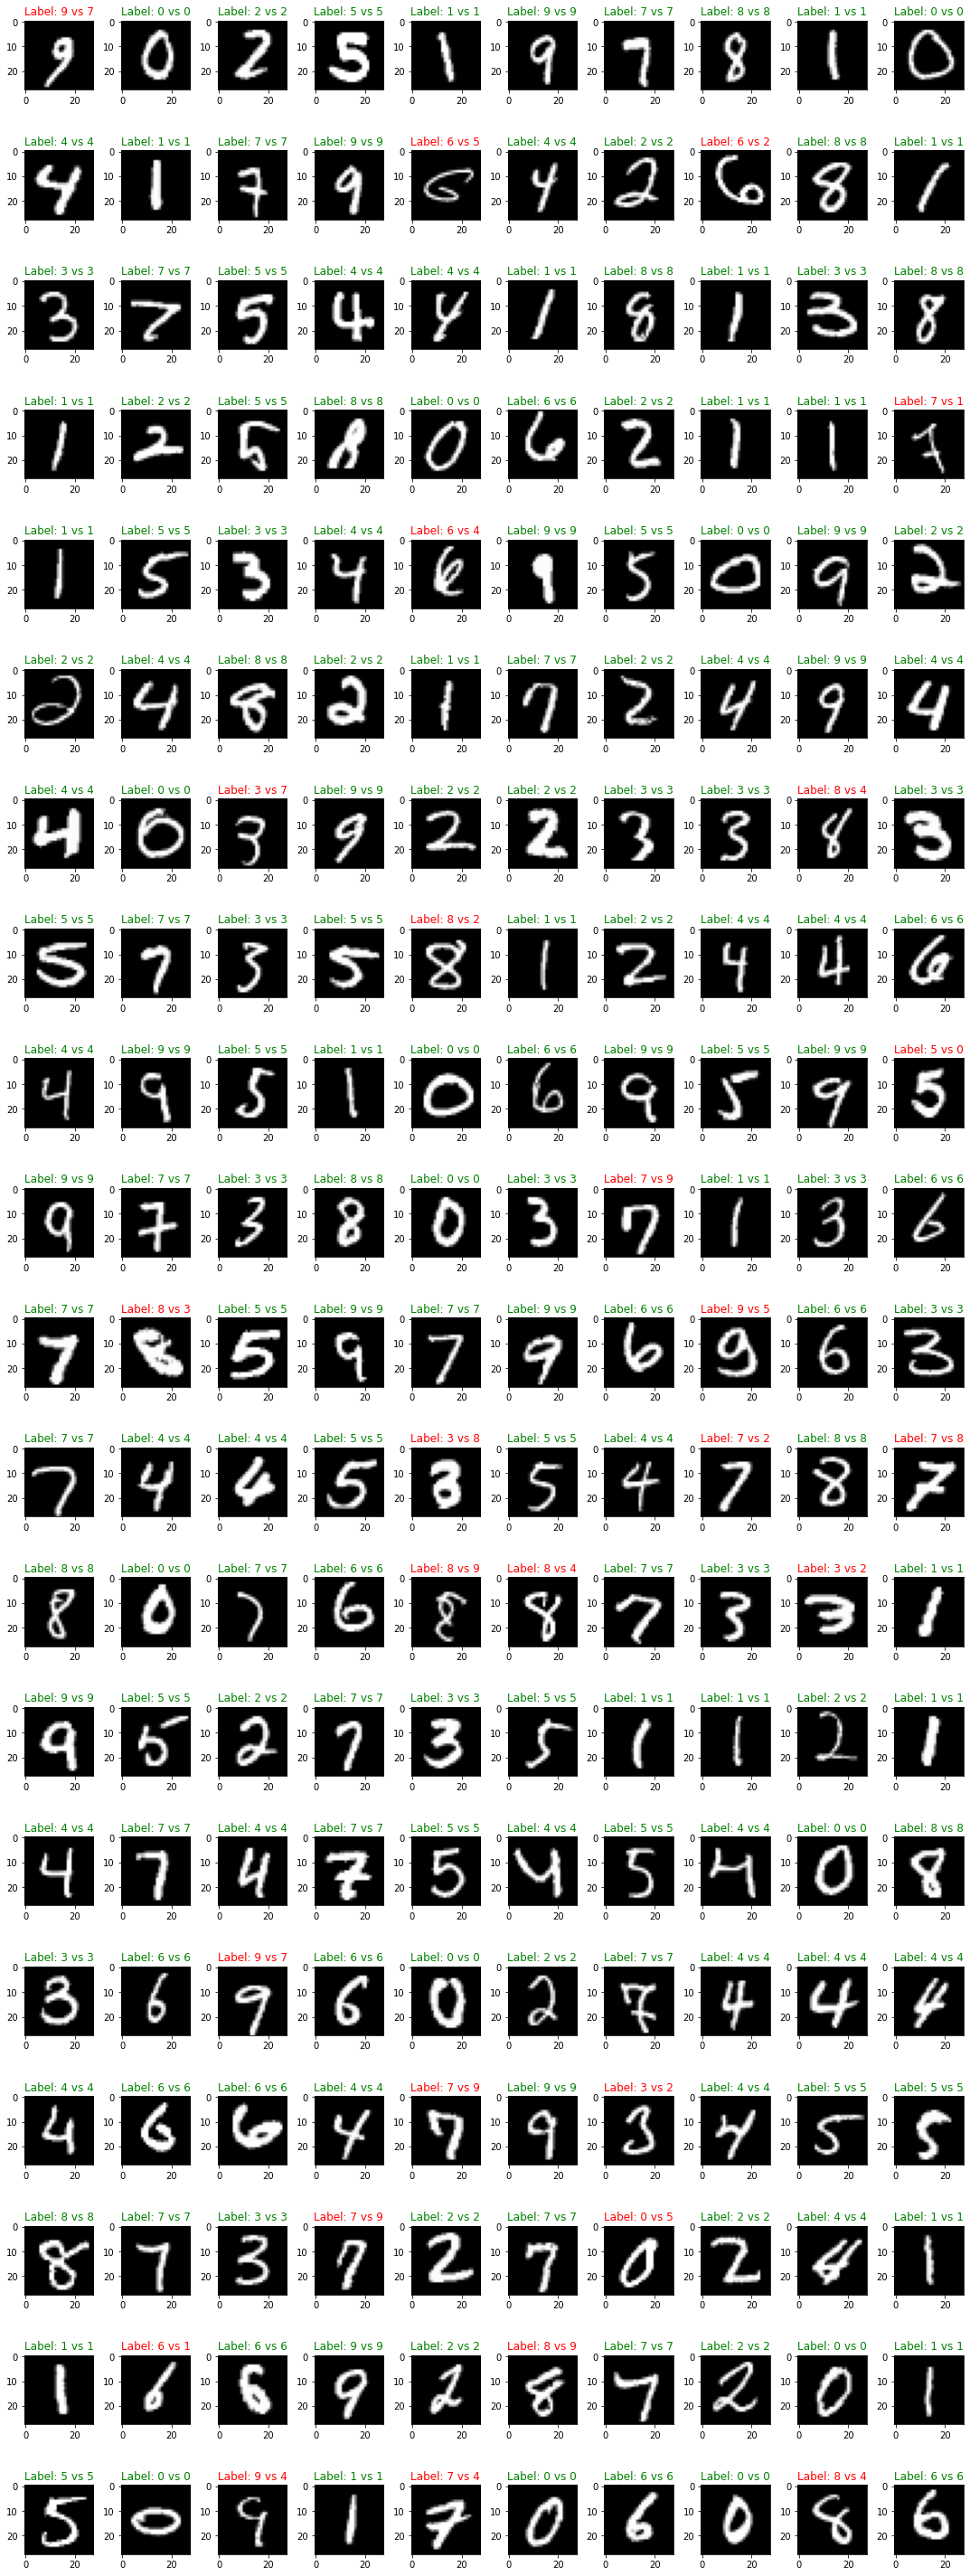

In [134]:
# visualize the result
cls.visualize()

In [135]:
# print prediction accuracy
cls.Test()

0.86

## Technical report

### Implementation
As the instruction, my nerual network consisted of linear function and non-linear functions. In addition, I implemented bias in my linear function and “Leaky-ReLU” for non-linear function. I constructed my model with nine layers. For each linear layer, the weights were generated randomly between 0 and 1, and the biases were 1.

e.g. ['Linear'], ['Leaky_ReLU'], ['Linear'], ['Leaky_ReLU'], ['Linear'], ['ReLU'], ['Linear'], ['Leaky_ReLU'], ['Linear'], ['ReLU'],['Linear']

### Experiment
The initial bias was 1 and the learning rate was 0.001. 
After the accuracy reached 0.8, the learning decreased to 0.0005
I tried different sizes of linear layers: 128, 256, 512, 1024
I tried different batch sizes: 8, 16, 32, 64, 128, 256, 512


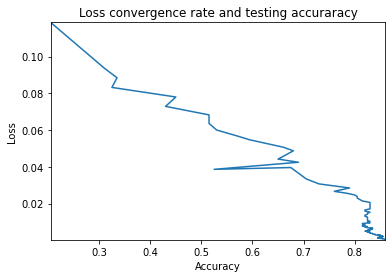

In [136]:
# Dataset
y = cls.loss_chart
x = cls.accuracy_chart

# Plotting the Graph
plt.plot(x, y)
plt.title("Loss convergence rate and testing accuraracy")
plt.xlabel("Accuracy")
plt.ylabel("Loss")

plt.axis([min(x), max(x), min(y), max(y)])

plt.show()

### Obeservation
1. The learning rate doesn't influence the result much
2. The batch size doesn't infuence the result much
3. The complexity of the network affects the result
4. "ReLU v.s. Leaky ReLU" doesn't make a huge different for small model like this assignment.
5. The higher the batch size is, the lower of the initial accuracy will be. Supposely, big batch size should generalize the model with high accurary. But in our case, it didn't affect the result significantly.
6. The model barely reach 0.9 accuracy even with complicated layers.

### Potential reasons of failures
1. Biases are not implemented.
2. digits that are not well written confuse the model. For example, scribbled 4 and 9 might look very similar.
3. The data of specific cases are missing, giving the model little information to learn. For example, scribbled 1 and 7 and rare in the set.